In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logisitic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

Logisitic Regression Results
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1700
           1       0.95      0.95      0.95      1643

    accuracy                           0.95      3343
   macro avg       0.95      0.95      0.95      3343
weighted avg       0.95      0.95      0.95      3343

ROC-AUC: 0.9482095163080448


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=50,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC–AUC:", roc_auc_score(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1643

    accuracy                           1.00      3343
   macro avg       1.00      1.00      1.00      3343
weighted avg       1.00      1.00      1.00      3343

ROC–AUC: 0.9987827145465611


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC–AUC:", roc_auc_score(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:56:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1643

    accuracy                           1.00      3343
   macro avg       1.00      1.00      1.00      3343
weighted avg       1.00      1.00      1.00      3343

ROC–AUC: 0.9987929182628621


In [15]:
X_full = df.drop(['isFraud','isFlaggedFraud'], axis=1)
y_full = df['isFraud']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)
X_test_full_scaled = scaler.transform(X_test_full)

y_pred = xgb.predict(X_test_full_scaled)
print(classification_report(y_test_full, y_pred))
print("ROC–AUC:", roc_auc_score(y_test_full, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.66      1.00      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.83      1.00      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC–AUC: 0.9993636255175835


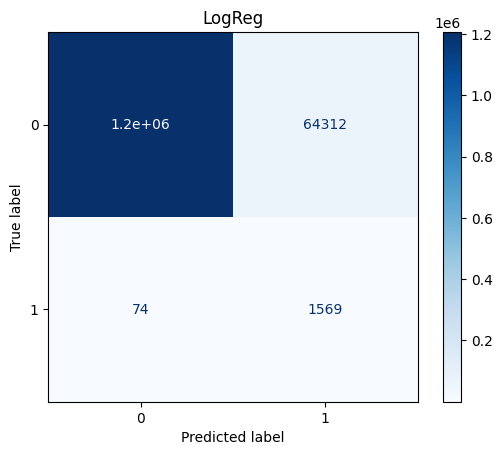

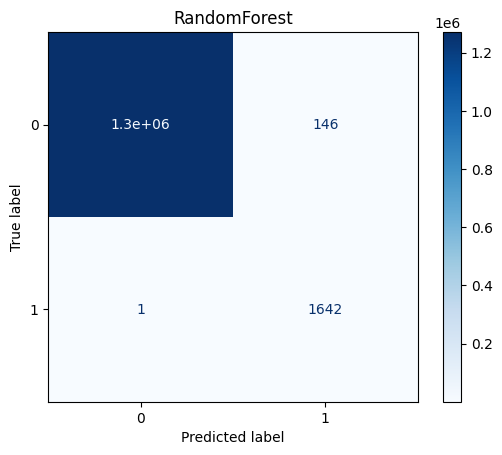

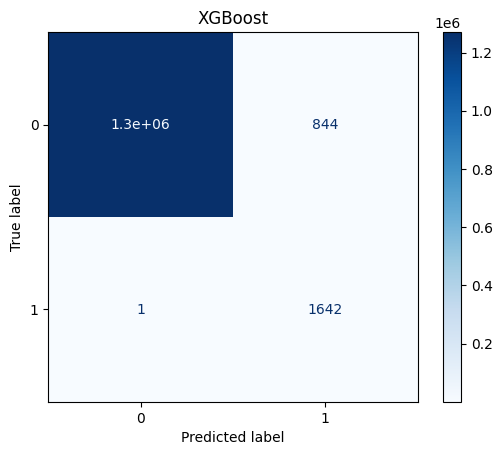

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
model = {'LogReg':log_reg, 'RandomForest':rf, 'XGBoost':xgb}
for name, m in model.items():
  disp = ConfusionMatrixDisplay.from_estimator(m, X_test_full_scaled, y_test_full, cmap='Blues')
  disp.ax_.set_title(name)
  plt.show()

In [20]:
#Save best models
import joblib
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(xgb, "models/xgboost_model.pkl")
joblib.dump(rf, "models/random_forest_model.pkl")

['models/random_forest_model.pkl']